In [124]:
import torch
import hw1_utils as utils
import matplotlib.pyplot as plt

In [47]:
n = 100
d = 10
X = torch.randn(n,d)
u = torch.randn(d)
y = X @ u + torch.randn(n)/10
Y = X @ u + torch.randn(n)/10

In [48]:
w = torch.zeros(X.size(dim=1))
w

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
for t in range(1000):
    loss = ((X @ w - y)**2).mean()
    w -= 0.1/n * X.T @ (X @ w - y)

    print(t,loss)

0 tensor(11.7431)
1 tensor(9.2794)
2 tensor(7.3703)
3 tensor(5.8831)
4 tensor(4.7186)
5 tensor(3.8021)
6 tensor(3.0772)
7 tensor(2.5010)
8 tensor(2.0409)
9 tensor(1.6718)
10 tensor(1.3744)
11 tensor(1.1339)
12 tensor(0.9385)
13 tensor(0.7792)
14 tensor(0.6489)
15 tensor(0.5419)
16 tensor(0.4539)
17 tensor(0.3812)
18 tensor(0.3210)
19 tensor(0.2710)
20 tensor(0.2294)
21 tensor(0.1947)
22 tensor(0.1658)
23 tensor(0.1415)
24 tensor(0.1211)
25 tensor(0.1040)
26 tensor(0.0896)
27 tensor(0.0775)
28 tensor(0.0672)
29 tensor(0.0585)
30 tensor(0.0512)
31 tensor(0.0450)
32 tensor(0.0397)
33 tensor(0.0352)
34 tensor(0.0314)
35 tensor(0.0281)
36 tensor(0.0253)
37 tensor(0.0230)
38 tensor(0.0209)
39 tensor(0.0192)
40 tensor(0.0177)
41 tensor(0.0164)
42 tensor(0.0153)
43 tensor(0.0144)
44 tensor(0.0136)
45 tensor(0.0129)
46 tensor(0.0123)
47 tensor(0.0118)
48 tensor(0.0113)
49 tensor(0.0110)
50 tensor(0.0106)
51 tensor(0.0103)
52 tensor(0.0101)
53 tensor(0.0099)
54 tensor(0.0097)
55 tensor(0.0095)
5

In [115]:
def linear_gd(X, Y, lrate=0.01, num_iter=1000):
    '''
    Arguments:
        X (n x d FloatTensor): the feature matrix
        Y (n x 1 FloatTensor): the labels
        num_iter (int): iterations of gradient descent to perform

    Returns:
        (d + 1) x 1 FloatTensor: the parameters w
    '''
    n = X.size(0)
    pX = torch.cat((torch.ones(n, 1), X), dim=1)
    w = torch.zeros(pX.size(1))
    for _ in range(num_iter):
        w -= lrate/n * pX.T @ (pX @ w - Y)
    return w

In [116]:
linear_gd(X,Y)

tensor([ 0.0078, -1.8486, -0.6616, -0.5068,  1.5651, -0.0858,  0.7371,  1.4515,
         0.9136,  1.4586, -0.2312])

In [133]:
def linear_normal(X, Y):
    '''
    Arguments:
        X (n x d FloatTensor): the feature matrix
        Y (n x 1 FloatTensor): the labels

    Returns:
        (d + 1) x 1 FloatTensor: the parameters w
    '''
    n = X.size(0)
    bX = torch.cat((torch.ones(n, 1), X), dim=1)
    w = torch.pinverse(bX) @ Y
    return w

In [123]:
linear_normal(X,Y)


tensor(0.0103)


tensor([ 1.7599e-03, -1.8608e+00, -6.7251e-01, -5.0361e-01,  1.5699e+00,
        -7.8858e-02,  7.3880e-01,  1.4500e+00,  9.1706e-01,  1.4721e+00,
        -2.2336e-01])

In [136]:
def plot_linear():
    '''
        Returns:
            Figure: the figure plotted with matplotlib
    '''
    X,Y = utils.load_reg_data()
    w = linear_normal(X,Y)
    plt.scatter(X.numpy(),Y.numpy())
    plt.plot(w,"r-")


In [171]:
X = torch.randn(n,d)
n = X.size(0)
X = torch.cat((torch.ones(n, 1), X), dim=1)

In [178]:
def plot_linear():
    """
    Returns:
        Figure: the figure plotted with matplotlib
    """
    rX, Y = utils.load_reg_data()
    w = linear_normal(rX, Y)
    bX = torch.cat((torch.ones(rX.size(0), 1), rX), dim=1)
    pY = bX @ w
    
    
    plt.scatter(bX.cpu()[:,1],Y.cpu())
    plt.plot(bX.cpu()[:,1],pY.cpu(), "r-")
   
    return plt.show()

In [208]:
def poly_gd(X, Y, lrate=0.01, num_iter=1000):
    """
    Arguments:
        X (n x d FloatTensor): the feature matrix
        Y (n x 1 FloatTensor): the labels
        lrate (float): the learning rate
        num_iter (int): number of iterations of gradient descent to perform

    Returns:
        (1 + d + d * (d + 1) / 2) x 1 FloatTensor: the parameters w
    """
    n = X.size(0)
    d = X.size(1)
    
    X = torch.cat((torch.ones(n, 1), X), dim=1) 
    
   
    features = []
    for i in range(1, d + 1):
        for j in range(i, d + 1):
            product = (X[:, i] * X[:, j]).unsqueeze(1)
            features.append(product)
    featureTensor = torch.cat(features, dim=1)
    
    X_poly = torch.cat([X, featureTensor], dim=1)
    
    w = torch.zeros(X_poly.size(1), 1)
    for _ in range(num_iter):
        grad = X_poly.T @ (X_poly @ w - Y) / n
        w -= lrate * grad

    return w


In [209]:
X, Y = utils.load_reg_data()
poly_gd(X,Y)

tensor([[0.6936],
        [0.4309],
        [0.3975]])

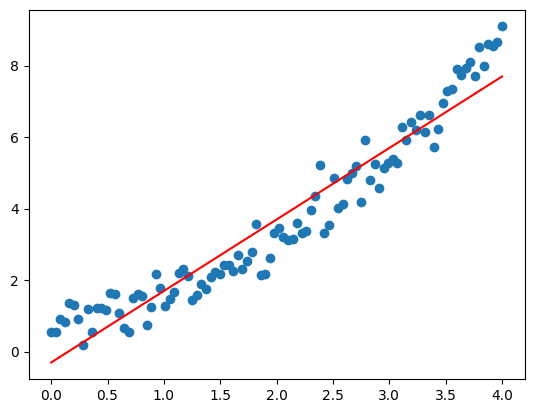

In [179]:
plot_linear()

In [212]:
def poly_normal(X, Y):
    """
    Arguments:
        X (n x d FloatTensor): the feature matrix
        Y (n x 1 FloatTensor): the labels

    Returns:
        (1 + d + d * (d + 1) / 2) x 1 FloatTensor: the parameters w
    """
    n = X.size(0)
    d = X.size(1)
    
    X = torch.cat((torch.ones(n, 1), X), dim=1) 
    
   
    features = []
    for i in range(1, d + 1):
        for j in range(i, d + 1):
            product = (X[:, i] * X[:, j]).unsqueeze(1)
            features.append(product)
    featureTensor = torch.cat(features, dim=1)
    
    X_poly = torch.cat([X, featureTensor], dim=1)
    w = torch.pinverse(X_poly) @ Y
    return w

In [213]:
X,Y = utils.load_reg_data()
poly_normal(X,Y)

tensor([[0.8645],
        [0.2284],
        [0.4428]])

In [220]:
def plot_poly():
    """
    Returns:
        Figure: the figure plotted with matplotlib
    """
    X,Y = utils.load_reg_data()
    w = poly_normal(X,Y)
    
    n = X.size(0)
    d = X.size(1)
    bX = torch.cat((torch.ones(n, 1), X), dim=1) 
    X = torch.cat((torch.ones(n, 1), X), dim=1) 
    
   
    features = []
    for i in range(1, d + 1):
        for j in range(i, d + 1):
            product = (X[:, i] * X[:, j]).unsqueeze(1)
            features.append(product)
    featureTensor = torch.cat(features, dim=1)
    
    X_poly = torch.cat([X, featureTensor], dim=1)
    pY = X_poly @ w
    plt.scatter(bX.cpu()[:,1],Y.cpu())
    plt.plot(X_poly.cpu()[:,1],pY.cpu(), "r-")
   
    return plt.show()

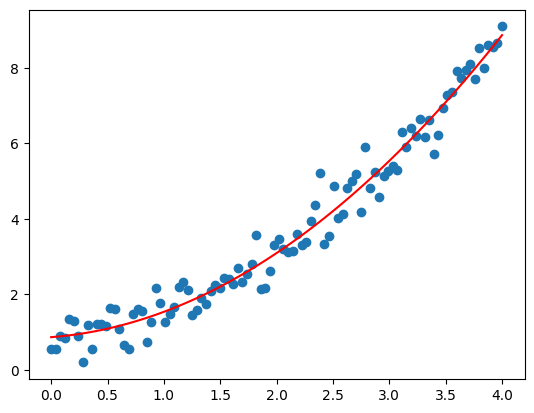

In [221]:
plot_poly()